# Multiclass Classification Of Newspaper Articles Into Respective Categories

For this project I will be using the Keras Reuters dataset in order to attempt a multiclass classification problem.

In [18]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)


def one_hot_encode(sequences,dimensions=10000):
    results = np.zeros((len(sequences),dimensions))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.

    return results

print('Encoded sequence of words in newspaper article',train_data[0])
print('Class',train_labels[0])

Encoded sequence of words in newspaper article [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
Class 3


So for this particular challenge there are 46 different classes into which the newspapers can fall. An example has been printed above.

In [19]:
x_train=one_hot_encode(train_data)
x_test=one_hot_encode(test_data)
y_train=one_hot_encode(train_labels,46)
y_test = one_hot_encode(test_labels,46)

x_val = x_train[:1000]
partial_x_train= x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

For this example I've split the data into both a training and validation set in order to analyse how the model will perform against new data after each training epoch. This gives me a good idea of when my model will start overfitting. Overfitting is the equivalent of learning the answers to an exam you're taking. The real magic happens in the working. If a machine learning algorithm overfits it simply learns how to classify the data you've given it and will struggle with any new data. When using a validation you can constantly give your algorithm new after each epoch to determine whether or not the model is still improving. This will require taking advantage of the validation_data field. 

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 257us/step - loss: 2.5318 - acc: 0.4945 - val_loss: 1.7235 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.4504 - acc: 0.6873 - val_loss: 1.3487 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.0985 - acc: 0.7646 - val_loss: 1.1696 - val_acc: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.8701 - acc: 0.8172 - val_loss: 1.0805 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.7028 - acc: 0.8468 - val_loss: 0.9828 - val_acc: 0.7850
Epoch 6/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.5659 - acc: 0.8799 - val_loss: 0.9388 - val_acc: 0.8020
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.4584 - acc: 0.9047 - val_loss: 0.9059 - val_acc: 0.8050


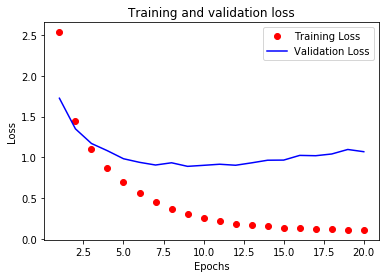

In [20]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

This shows you the relationship between number of epochs and overfitting. There comes a point when a minimum is reached on the validation curve. This is where the accuracy of the model has reached its peak. The validation loss is evidently lowest here. The training loss continues to dip as the accuracy of the model improves. It peaks at about epoch 9 and then dips again. So this is where we want to cut our algorithm short. Before that though, an experiment. What will happen if we make our model larger by adding extra hidden layers.

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 276us/step - loss: 2.2182 - acc: 0.5574 - val_loss: 1.4355 - val_acc: 0.6610
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.1376 - acc: 0.7496 - val_loss: 1.1182 - val_acc: 0.7690
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.7940 - acc: 0.8286 - val_loss: 0.9955 - val_acc: 0.7880
Epoch 4/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.5750 - acc: 0.8820 - val_loss: 0.9622 - val_acc: 0.7990
Epoch 5/20
7982/7982 [==============================] - 1s 175us/step - loss: 0.4239 - acc: 0.9102 - val_loss: 0.8861 - val_acc: 0.8270
Epoch 6/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.3148 - acc: 0.9344 - val_loss: 0.9524 - val_acc: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.2540 - acc: 0.9419 - val_loss: 0.8488 - val_acc: 0.8260


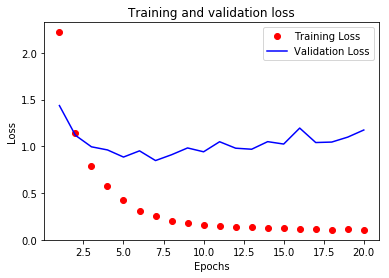

In [23]:
model2 = models.Sequential()

model2.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss2, 'ro', label='Training Loss')
plt.plot(epochs, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 302us/step - loss: 2.2824 - acc: 0.5104 - val_loss: 1.4693 - val_acc: 0.6600
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.2197 - acc: 0.7299 - val_loss: 1.1700 - val_acc: 0.7440
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 0.8964 - acc: 0.7984 - val_loss: 1.0325 - val_acc: 0.7640
Epoch 4/20
7982/7982 [==============================] - 1s 178us/step - loss: 0.6649 - acc: 0.8485 - val_loss: 0.9842 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 177us/step - loss: 0.4933 - acc: 0.8961 - val_loss: 0.9159 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 179us/step - loss: 0.3946 - acc: 0.9110 - val_loss: 0.9337 - val_acc: 0.8070
Epoch 7/20
7982/7982 [==============================] - 1s 178us/step - loss: 0.2801 - acc: 0.9385 - val_loss: 1.0034 - val_acc: 0.7960


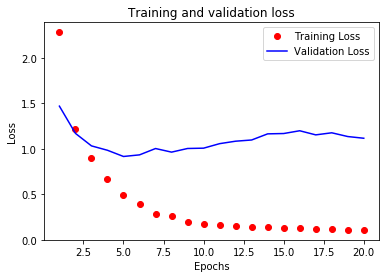

In [24]:
model3 = models.Sequential()

model3.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss3, 'ro', label='Training Loss')
plt.plot(epochs, val_loss3, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 272us/step - loss: 2.2894 - acc: 0.5645 - val_loss: 1.5102 - val_acc: 0.6760
Epoch 2/20
7982/7982 [==============================] - 1s 156us/step - loss: 1.1679 - acc: 0.7595 - val_loss: 1.1573 - val_acc: 0.7310
Epoch 3/20
7982/7982 [==============================] - 1s 158us/step - loss: 0.8183 - acc: 0.8327 - val_loss: 1.0084 - val_acc: 0.7880
Epoch 4/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.5943 - acc: 0.8809 - val_loss: 0.9430 - val_acc: 0.7970
Epoch 5/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.4448 - acc: 0.9082 - val_loss: 0.9036 - val_acc: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 163us/step - loss: 0.3439 - acc: 0.9291 - val_loss: 0.8806 - val_acc: 0.8190
Epoch 7/20
7982/7982 [==============================] - 1s 159us/step - loss: 0.2720 - acc: 0.9374 - val_loss: 0.8708 - val_acc: 0.8250


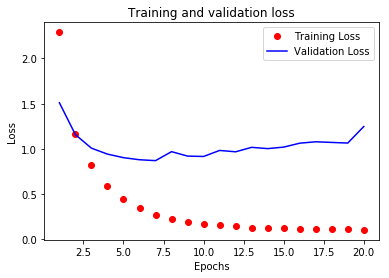

In [25]:
model4 = models.Sequential()

model4.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(46, activation='softmax'))

model4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history4 = model4.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss4, 'ro', label='Training Loss')
plt.plot(epochs, val_loss4, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 288us/step - loss: 2.4092 - acc: 0.5238 - val_loss: 1.5412 - val_acc: 0.6740
Epoch 2/20
7982/7982 [==============================] - 1s 158us/step - loss: 1.2506 - acc: 0.7261 - val_loss: 1.2410 - val_acc: 0.7340
Epoch 3/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.9011 - acc: 0.8051 - val_loss: 1.1122 - val_acc: 0.7470
Epoch 4/20
7982/7982 [==============================] - 1s 160us/step - loss: 0.6679 - acc: 0.8553 - val_loss: 0.9801 - val_acc: 0.8040
Epoch 5/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.5081 - acc: 0.8886 - val_loss: 1.0180 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.3847 - acc: 0.9178 - val_loss: 0.9378 - val_acc: 0.8110
Epoch 7/20
7982/7982 [==============================] - 1s 164us/step - loss: 0.3165 - acc: 0.9322 - val_loss: 0.9696 - val_acc: 0.8040


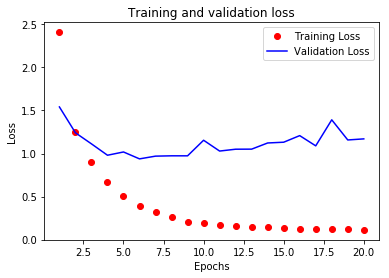

In [26]:
model5 = models.Sequential()

model5.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(64, activation='relu'))
model5.add(layers.Dense(46, activation='softmax'))

model5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history5= model5.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss5, 'ro', label='Training Loss')
plt.plot(epochs, val_loss5, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The above examples show a basic hyperparameter tuning to reach as a low a validation loss as possible. This seems to happen with both of the 2 layer networks. Increasing the number of hidden layers in both brought back a much lower but more volatile 0.84 loss whereas increasing the number of hidden layers in 1 resulted in a much smoother but higher 0.87 loss. Let's see which one performs better on the test data when trained properly. This occurred on both at around epoch 7.

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 2s 302us/step - loss: 2.2137 - acc: 0.5636 - val_loss: 1.3593 - val_acc: 0.7150
Epoch 2/7
7982/7982 [==============================] - 1s 140us/step - loss: 1.0938 - acc: 0.7676 - val_loss: 1.1254 - val_acc: 0.7840
Epoch 3/7
7982/7982 [==============================] - 1s 143us/step - loss: 0.7725 - acc: 0.8385 - val_loss: 0.9892 - val_acc: 0.7830
Epoch 4/7
7982/7982 [==============================] - 1s 142us/step - loss: 0.5703 - acc: 0.8820 - val_loss: 0.9208 - val_acc: 0.8080
Epoch 5/7
7982/7982 [==============================] - 1s 153us/step - loss: 0.4028 - acc: 0.9176 - val_loss: 0.9313 - val_acc: 0.7870
Epoch 6/7
7982/7982 [==============================] - 1s 143us/step - loss: 0.3155 - acc: 0.9350 - val_loss: 0.9601 - val_acc: 0.8030
Epoch 7/7
7982/7982 [==============================] - 1s 143us/step - loss: 0.2528 - acc: 0.9434 - val_loss: 0.9574 - val_acc: 0.8090
Train o

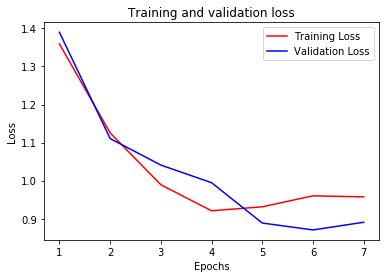

In [28]:
model_final_2 = models.Sequential()

model_final_2.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model_final_2.add(layers.Dense(128, activation='relu'))
model_final_2.add(layers.Dense(46, activation='softmax'))

model_final_2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history_final_2 = model_final_2.fit(partial_x_train,
                    partial_y_train, 
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss_final_2 = history_final_2.history['loss']
val_loss_final_2 = history_final_2.history['val_loss']

epochs = range(1, len(loss_final_2)+1)

model_final_4 = models.Sequential()

model_final_4.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model_final_4.add(layers.Dense(64, activation='relu'))
model_final_4.add(layers.Dense(46, activation='softmax'))

model_final_4.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history_final_4 = model_final_4.fit(partial_x_train,
                    partial_y_train, 
                    epochs=7,
                    batch_size=512,
                    validation_data=(x_val,y_val))

loss_final_4 = history_final_4.history['loss']
val_loss_final_4 = history_final_4.history['val_loss']

epochs = range(1, len(loss_final_4)+1)

plt.plot(epochs, val_loss_final_2, 'r', label='Training Loss')
plt.plot(epochs, val_loss_final_4, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



Model 4 seems to overall outperform model 2. Let's see how it does with the test data.

In [37]:
model_final = models.Sequential()

model_final.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model_final.add(layers.Dense(64, activation='relu'))
model_final.add(layers.Dense(46, activation='softmax'))

model_final.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model_final.fit(partial_x_train,
        partial_y_train, 
        epochs=9,
        batch_size=512,
        validation_data=(x_val,y_val))

model_final_3 = models.Sequential()

model_final_3.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model_final_3.add(layers.Dense(128, activation='relu'))
model_final_3.add(layers.Dense(64, activation='relu'))
model_final_3.add(layers.Dense(46, activation='softmax'))

model_final_3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model_final_3.fit(partial_x_train,
        partial_y_train, 
        epochs=5,
        batch_size=512,
        validation_data=(x_val,y_val))

model_final_5 = models.Sequential()

model_final_5.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model_final_5.add(layers.Dense(64, activation='relu'))
model_final_5.add(layers.Dense(64, activation='relu'))
model_final_5.add(layers.Dense(46, activation='softmax'))

model_final_5.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

model_final_5.fit(partial_x_train,
        partial_y_train, 
        epochs=6,
        batch_size=512,
        validation_data=(x_val,y_val))
score4 = model_final_4.evaluate(x_test,y_test)
score2 = model_final_2.evaluate(x_test,y_test)
score5 = model_final_5.evaluate(x_test,y_test)
score1 = model_final.evaluate(x_test,y_test)
score3 = model_final_3.evaluate(x_test,y_test)
print(score4)
print(score2)
print(score5)
print(score1)
print(score3)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 269us/step - loss: 2.5692 - acc: 0.5159 - val_loss: 1.7135 - val_acc: 0.6320
Epoch 2/9
7982/7982 [==============================] - 1s 109us/step - loss: 1.4133 - acc: 0.6968 - val_loss: 1.3143 - val_acc: 0.7060
Epoch 3/9
7982/7982 [==============================] - 1s 103us/step - loss: 1.0590 - acc: 0.7722 - val_loss: 1.1433 - val_acc: 0.7540
Epoch 4/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.8453 - acc: 0.8198 - val_loss: 1.0476 - val_acc: 0.7740
Epoch 5/9
7982/7982 [==============================] - 1s 108us/step - loss: 0.6726 - acc: 0.8578 - val_loss: 1.0118 - val_acc: 0.7690
Epoch 6/9
7982/7982 [==============================] - 1s 115us/step - loss: 0.5393 - acc: 0.8880 - val_loss: 0.9351 - val_acc: 0.7910
Epoch 7/9
7982/7982 [==============================] - 1s 104us/step - loss: 0.4309 - acc: 0.9102 - val_loss: 0.8915 - val_acc: 0.8190
Epoch 8

Comparisons between the various models can be seen here! Model 4 outperformed the other 4 significantly